# <center>Graduate Admission Chance Prediction 🎓</center>

<center><img width="800px" src="https://images.unsplash.com/photo-1607013407627-6ee814329547?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=664&q=80"></center>

# About the Dataset

* **GRE Scores** ( out of 340 ) - *Input Variable*
* **TOEFL Scores** ( out of 120 ) - *Input Variable*
* **University Rating** ( out of 5 ) - *Input Variable*
* **Statement of Purpose Strength** ( out of 5 ) - *Input Variable*
* **Letter of Recommendation Strength** ( out of 5 ) - *Input Variable*
* **Undergraduate GPA** ( out of 10 ) - *Input Variable*
* **Research Experience** ( either 0 or 1 ) - *Input Variable*
* **Chance of Admit** ( ranging from 0 to 1 ) - *Output Variable*

# Importing the Essential Libraries, Metrics, Tools and Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor

# Loading the Data

In [2]:
df = pd.read_csv("../input/graduate-admissions/Admission_Predict_Ver1.1.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset.***

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


***Checking the shape—i.e. size—of the data.***

In [4]:
df.shape

(500, 9)

***Learning the dtypes of columns' and how many non-null values there are in those columns.***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


***Getting the statistical summary of dataset.***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Checking for Missing Values and Duplicates

In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

***There is no missing value and duplicate, data seems clean so far.***

<h2>Putting the Data into More Proper Form</h2>

***Dropping redundant columns***

In [9]:
df.drop("Serial No.", axis=1, inplace=True)

***Renaming columns (removing whitespace around "LOR" and "Chance of Admit" columns)***

In [10]:
df.rename(columns={"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace=True)

# Data Visualization

***Visualizing the Correlation between the numerical variables using pairplot visualization.***

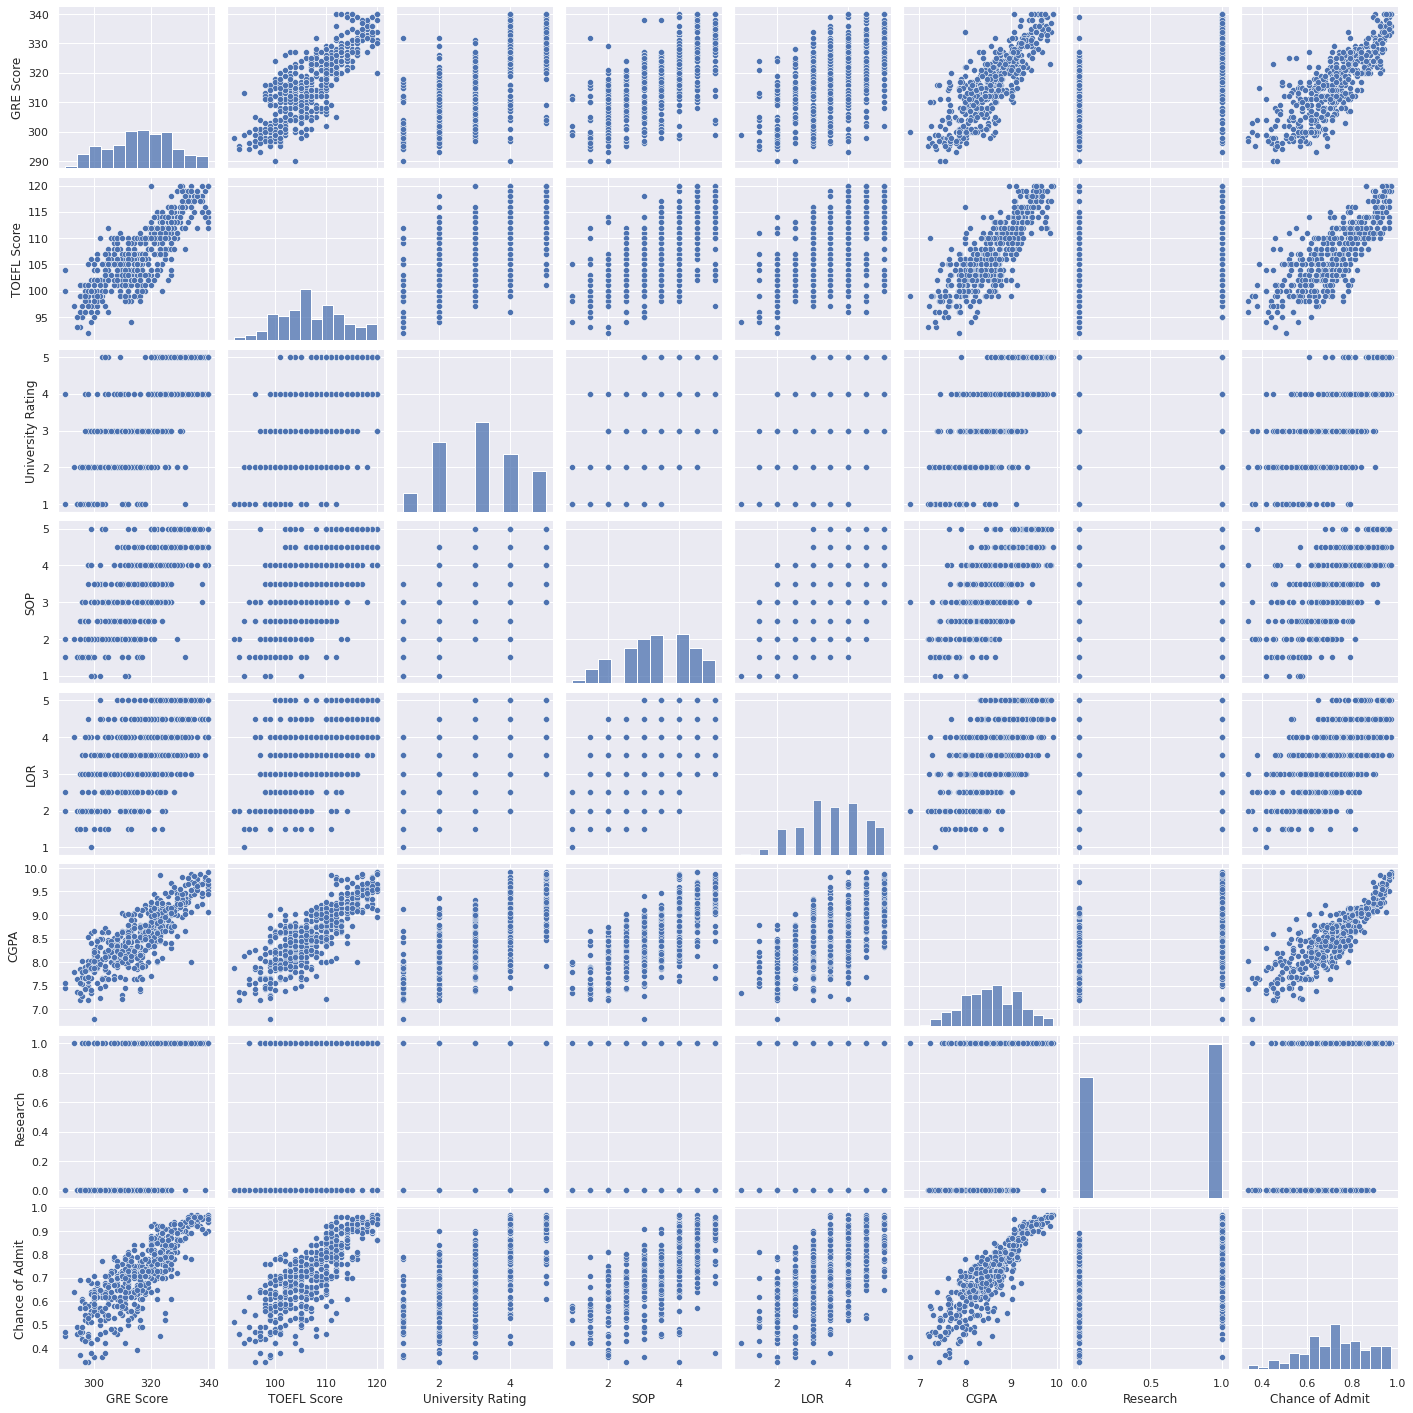

In [11]:
sns.set_theme()

sns.pairplot(df)

<h2>Distribution of Each Variable</h2>

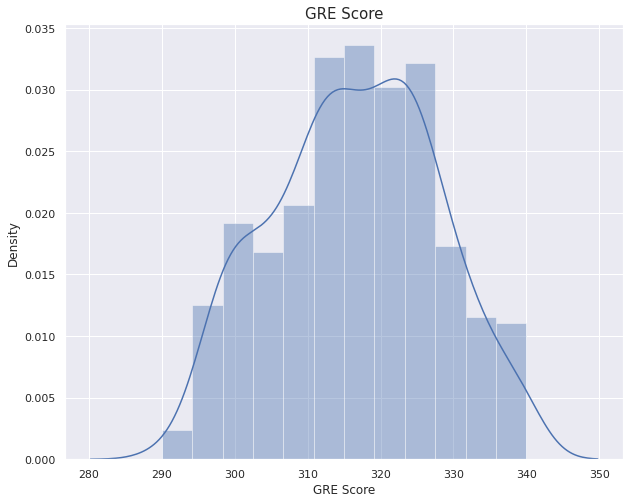

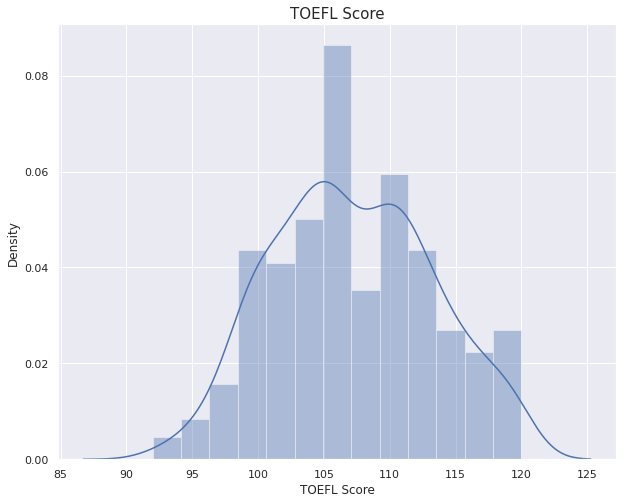

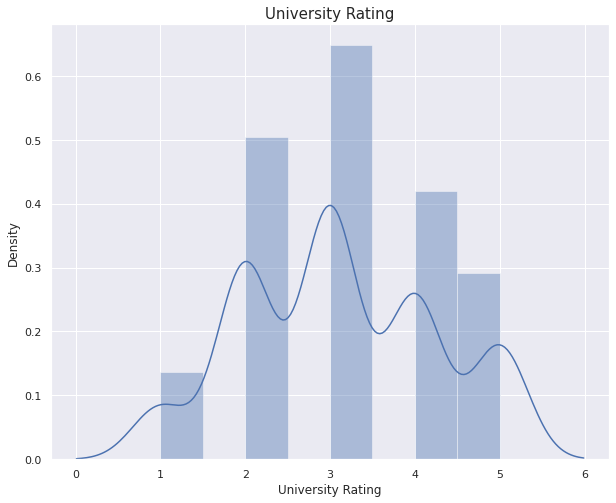

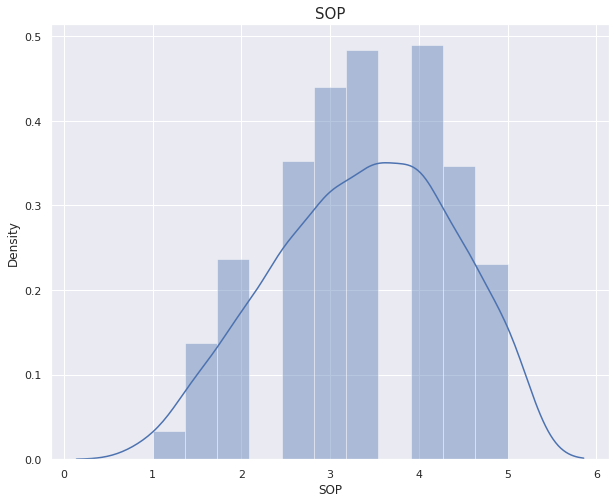

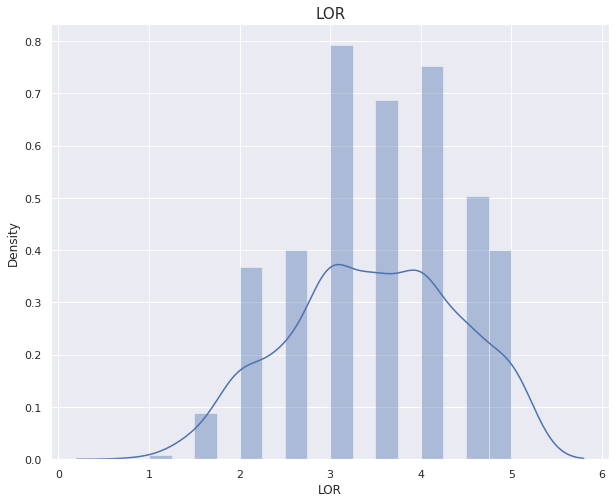

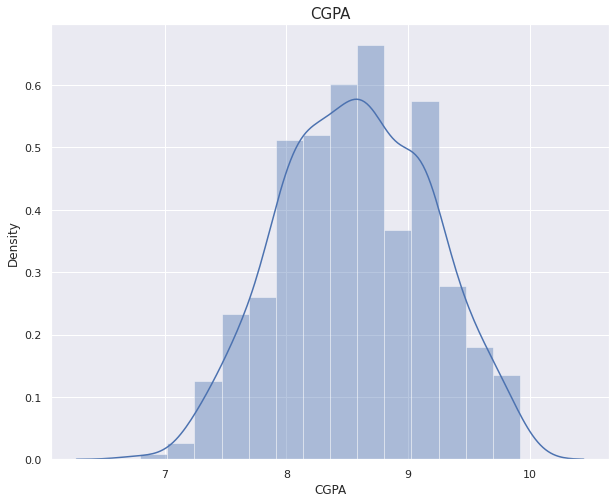

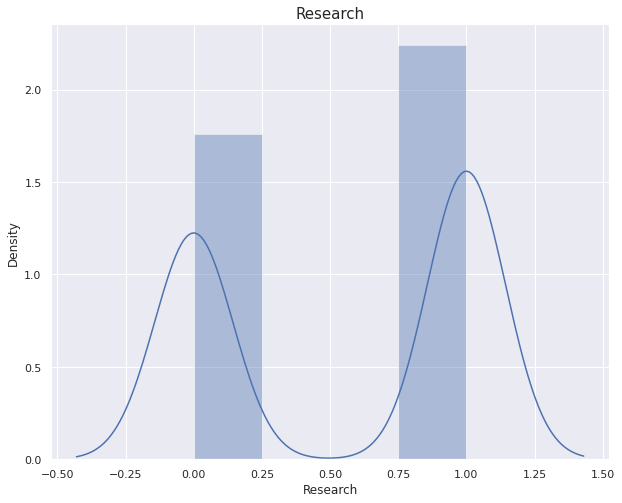

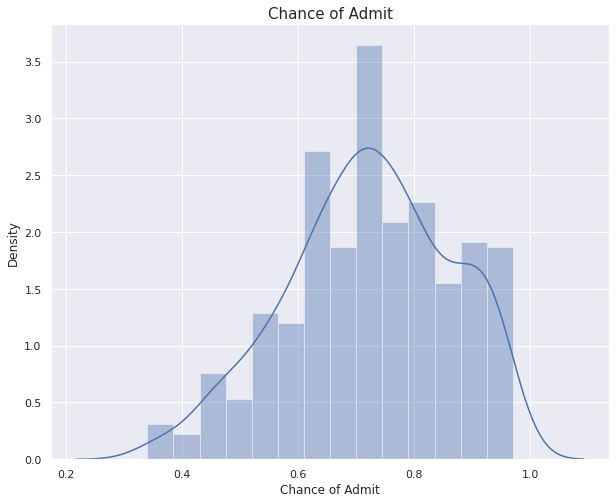

In [12]:
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

<h2>Relationship Between Each Variable and Target Variable (Chance of Admit)</h2>

<Figure size 720x576 with 0 Axes>

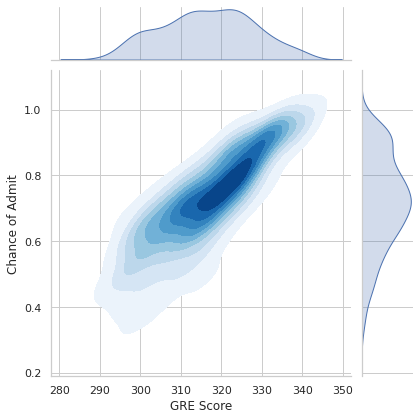

<Figure size 720x576 with 0 Axes>

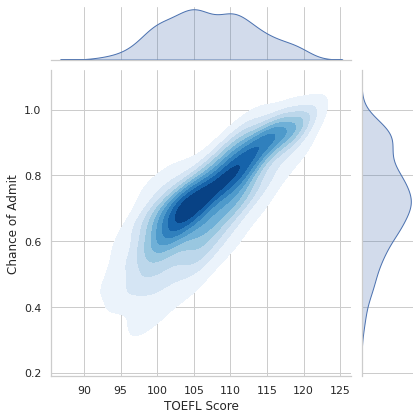

<Figure size 720x576 with 0 Axes>

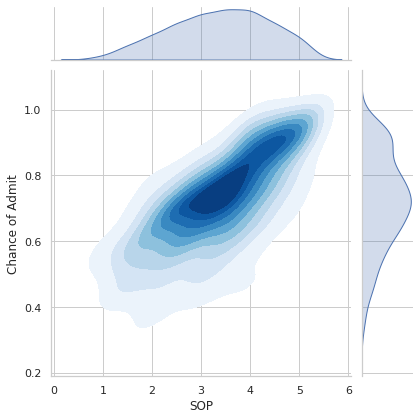

<Figure size 720x576 with 0 Axes>

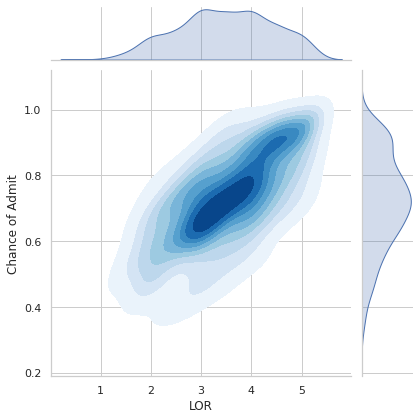

<Figure size 720x576 with 0 Axes>

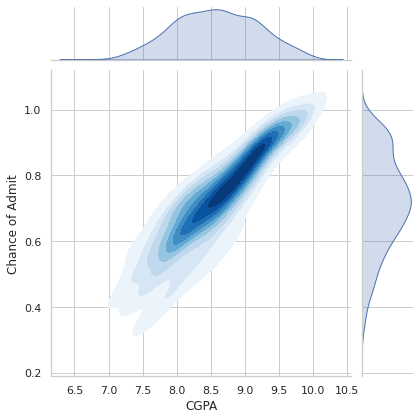

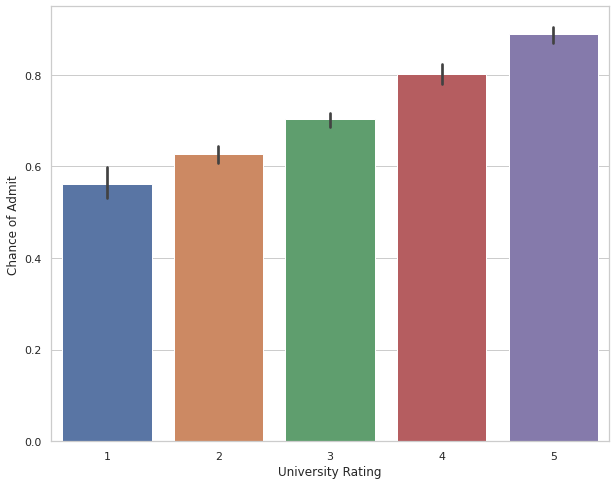

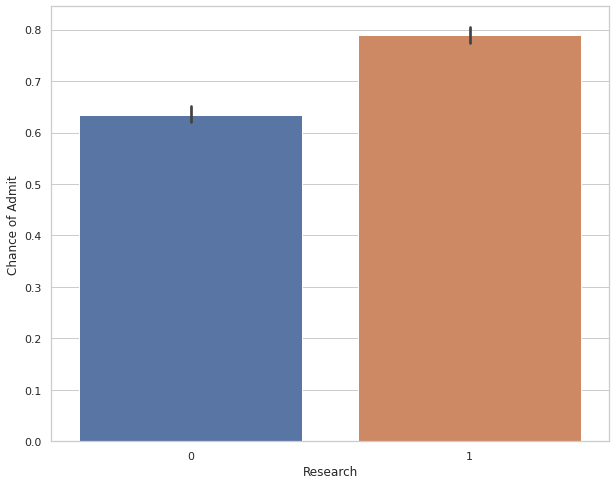

In [13]:
sns.set(style="whitegrid")

num_cols = df.drop(["University Rating", "Research", "Chance of Admit"], axis=1).columns
cat_cols = df[["University Rating", "Research"]].columns

for col in num_cols:
    plt.figure(figsize=(10,8))
    sns.jointplot(x=df[col], y=df["Chance of Admit"], kind="kde", cmap="Blues", fill=True)
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(10,8))
    sns.barplot(x=df[col], y=df["Chance of Admit"])
    plt.show()

***Visualizing the linear correlations between variables using Heatmap visualization. The measure used for finding the linear correlation between each variable is Pearson Correlation Coefficient.***

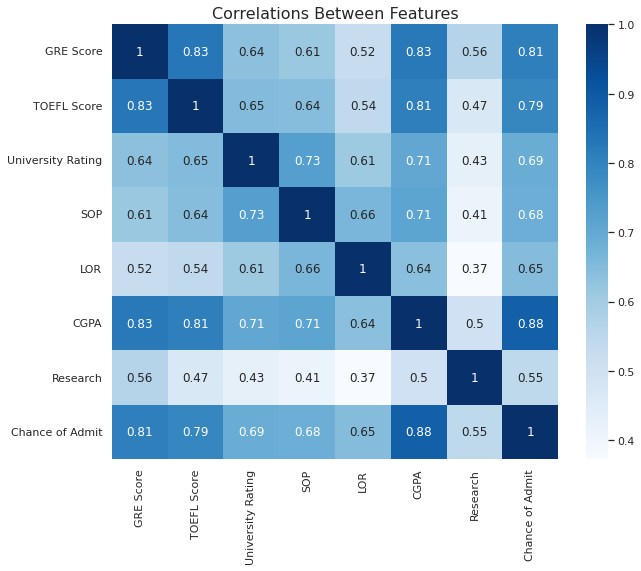

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Features", size=16)
plt.show()

# X, y Split

In [15]:
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

# Data Standardization

***Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1. Formula that StandardScaler() uses is as follows:***

<center><img width="250px" src="https://www.thoughtco.com/thmb/gItmqGd5HlnhyPIiLm1YHXOlTnw=/330x242/filters:fill(auto,1)/zscore-56a8fa785f9b58b7d0f6e87b.GIF"></center>

In [16]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-Test Split

***Splitting the data into Train and Test chunks for better evaluation.***

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***Defining several evaluation functions for convenience.***

In [18]:
def evaluate(y_test, predictions):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

# Machine Learning Models

In [19]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score", "RMSE (Cross-Validated)"])

<h3>Linear Regression</h3>

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lin_reg)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LinearRegression", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.042673413772238336
MSE: 0.0036342178012511044
R2 Score: 0.825630603991949
RMSE (Cross-Validated) 0.05946970564730745


<h3>Lasso (L1 Regularization)</h3>

In [21]:
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Lasso", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.11470247619047622
MSE: 0.020903199727891154
R2 Score: -0.002933371228675874
RMSE (Cross-Validated) 0.14109137897190635


<h3>Ridge (L2 Regularization)</h3>

In [22]:
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04270061231361663
MSE: 0.0036345033419606845
R2 Score: 0.8256169037780962
RMSE (Cross-Validated) 0.05946764528412187


<h3>Elastic Net</h3>

In [23]:
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "ElasticNet", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.11470247619047622
MSE: 0.020903199727891154
R2 Score: -0.002933371228675874
RMSE (Cross-Validated) 0.14109137897190635


<h3>Polynomial Regression (degree=2)</h3>

In [24]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_2d, y_train)
predictions = poly_reg.predict(X_test_2d)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(poly_reg)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "PolynomialRegression(degree=2)", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04287903645833333
MSE: 0.0037048202621936793
R2 Score: 0.8222431051835395
RMSE (Cross-Validated) 0.05946970564730745


<h3>LightGBM Regressor</h3>

In [25]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lgbm)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LGBMRegressor", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
models = models.append(new_row, ignore_index=True)

MAE: 0.04851568396483013
MSE: 0.004628327660361089
R2 Score: 0.7779333152826751
RMSE (Cross-Validated) 0.06709010411567293


In [26]:
models.sort_values(by="RMSE (Cross-Validated)")

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validated)
2,Ridge,0.042701,0.003635,0.825617,0.059468
0,LinearRegression,0.042673,0.003634,0.825631,0.059470
4,PolynomialRegression(degree=2),0.042879,0.003705,0.822243,0.059470
5,LGBMRegressor,0.048516,0.004628,0.777933,0.067090
1,Lasso,0.114702,0.020903,-0.002933,0.141091
3,ElasticNet,0.114702,0.020903,-0.002933,0.141091


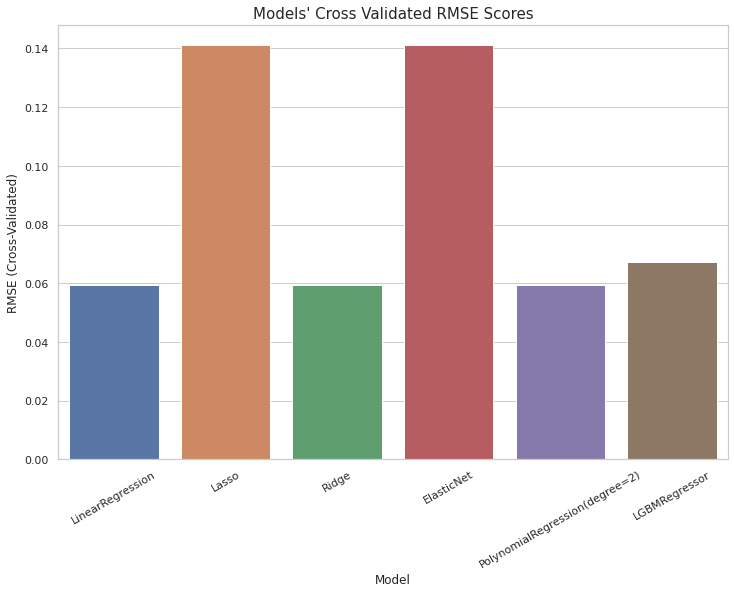

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validated)"])
plt.title("Models' Cross Validated RMSE Scores", size=15)
plt.xticks(rotation=30)
plt.show()

# Hyperparameter Tuning

In [28]:
tuned_models = pd.DataFrame(columns=["Model", "MAE", "MSE", "R2 Score", "RMSE (Cross-Validated)"])

<h3>Tuning the Lasso</h3>

In [29]:
param_grid_lasso = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "random_state": [42]}

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [30]:
lasso_params = grid_lasso.best_params_

lasso = Lasso(**lasso_params)
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lasso)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Lasso", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.04256663874429224
MSE: 0.0036483366315308648
R2 Score: 0.824953183968478
RMSE (Cross-Validated) 0.05924505407914452


<h3>Tuning the Ridge</h3>

In [31]:
param_grid_ridge = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                    "random_state": [42]}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [32]:
ridge_params = grid_ridge.best_params_

ridge = Ridge(**ridge_params)
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(ridge)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "Ridge", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.04270061231361663
MSE: 0.0036345033419606845
R2 Score: 0.8256169037780962
RMSE (Cross-Validated) 0.05946764528412187


<h3>Tuning the Elastic Net</h3>

In [33]:
param_grid_elasticnet = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         "l1_ratio": np.arange(0, 1, 0.05), 
                         "random_state": [42]}

grid_elasticnet = GridSearchCV(ElasticNet(), param_grid_elasticnet, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_elasticnet.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [34]:
elasticnet_params = grid_elasticnet.best_params_

elastic_net = ElasticNet(**elasticnet_params)
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(elastic_net)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "ElasticNet", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.0425706544849534
MSE: 0.0036473964391856763
R2 Score: 0.8249982943004195
RMSE (Cross-Validated) 0.05924753758790817


<h3>Tuning the LightGBM Regressor</h3>

In [35]:
param_grid_lgbm = {"num_leaves": [2, 3, 5, 7],
                   "learning_rate": [0.01, 0.05],
                   "n_estimators": [200, 500, 1000, 5000],
                   "max_bin": [100, 150, 200],
                   "random_state": [42]}

grid_lgbm = GridSearchCV(LGBMRegressor(), param_grid_lgbm, scoring="neg_root_mean_squared_error", cv=5, verbose=0, n_jobs=-1)

grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_bin': [100, 150, 200],
                         'n_estimators': [200, 500, 1000, 5000],
                         'num_leaves': [2, 3, 5, 7], 'random_state': [42]},
             scoring='neg_root_mean_squared_error')

In [36]:
lgbm_params = grid_lgbm.best_params_

lgbm = LGBMRegressor(**lgbm_params)
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_test)

mae, mse, r2 = evaluate(y_test, predictions)
rmse = rmse_cv(lgbm)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE (Cross-Validated)", rmse)

new_row = {"Model": "LGBMRegressor", "MAE": mae, "MSE": mse, "R2 Score": r2, "RMSE (Cross-Validated)": rmse}
tuned_models = tuned_models.append(new_row, ignore_index=True)

MAE: 0.0447729856742759
MSE: 0.00405482146570253
R2 Score: 0.8054500834673068
RMSE (Cross-Validated) 0.06058870123210024


# Model Comparison

In [37]:
tuned_models.sort_values(by="RMSE (Cross-Validated)")

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validated)
0,Lasso,0.042567,0.003648,0.824953,0.059245
2,ElasticNet,0.042571,0.003647,0.824998,0.059248
1,Ridge,0.042701,0.003635,0.825617,0.059468
3,LGBMRegressor,0.044773,0.004055,0.805450,0.060589


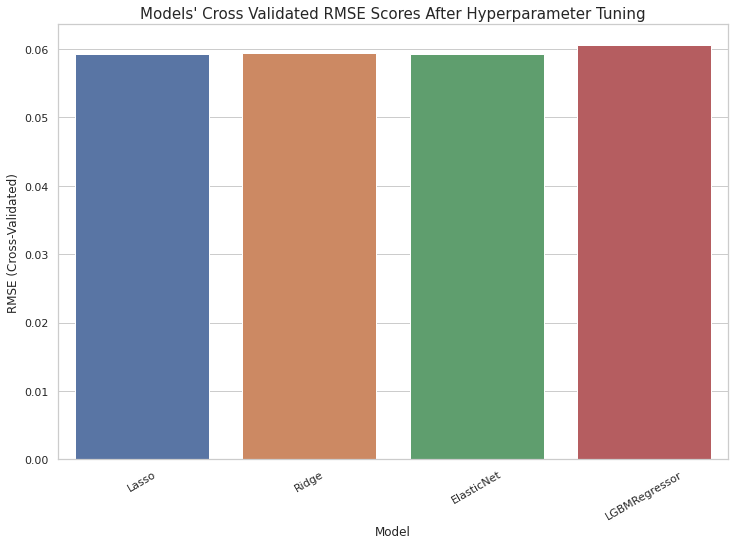

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=tuned_models["Model"], y=tuned_models["RMSE (Cross-Validated)"])
plt.title("Models' Cross Validated RMSE Scores After Hyperparameter Tuning", size=15)
plt.xticks(rotation=30)
plt.show()

# Conclusion

<h3>Since the Lasso model is yielding relatively less RMSE score after Hyperparameter Tuning, the winner in this comparison is Lasso (L1 Regularization).</h3>

<h1 style="font-family: Times New Roman;">Thank you so much for reading notebook. Preparing notebooks are taking a great deal of time. If you liked it, please do not forget to give upvote. Peace Out ✌️ ...</h1>